In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils.util import *
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")
# sns.set_context("paper")
sns.set_context("talk")

In [26]:
def runs_to_df(runs_result):
        val_name = "Accuracy"
        cong_train_accs, cong_test_accs = np.asarray(runs_result['cong_train_acc']), \
                                        np.asarray(runs_result['cong_test_acc'])
        incong_train_accs, incong_test_accs = np.asarray(runs_result['incong_train_acc']), \
                                                np.asarray(runs_result['incong_test_acc'])
        train_accs, test_accs = np.asarray(runs_result['train_acc']), np.asarray(runs_result['test_acc'])
        ratio_cong_incong_train = cong_train_accs / incong_train_accs
        ratio_cong_incong_test = cong_test_accs / incong_test_accs

        runs, checkpoints = train_accs.shape

        # ratio_hidd = pd.DataFrame(ratio_hidds, columns=np.arange(checkpoints)) 
        # ratio_hidd.insert(0, 'runs', np.arange(runs))
        # df_ratio_hidds = pd.melt(ratio_hidd, id_vars=['runs'], var_name='steps', value_name=val_name)
        # df_ratio_hidds['Label'] = 'ratio_dist_hidds'

        ratio_tr = pd.DataFrame(ratio_cong_incong_train, columns=np.arange(checkpoints)) 
        ratio_tr.insert(0, 'runs', np.arange(runs))
        df_ratio_cong_incong_acc_tr = pd.melt(ratio_tr, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_ratio_cong_incong_acc_tr['Label'] = 'ratio_accs_train'

        ratio_ts = pd.DataFrame(ratio_cong_incong_test, columns=np.arange(checkpoints)) 
        ratio_ts.insert(0, 'runs', np.arange(runs))
        df_ratio_cong_incong_acc_ts = pd.melt(ratio_ts, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_ratio_cong_incong_acc_ts['Label'] = 'ratio_accs_test'

        tr = pd.DataFrame(train_accs, columns=np.arange(checkpoints)) 
        tr.insert(0, 'runs', np.arange(runs))
        df_train = pd.melt(tr, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_train['Label'] = 'train'

        ts = pd.DataFrame(test_accs, columns=np.arange(checkpoints)) 
        ts.insert(0, 'runs', np.arange(runs))
        df_test = pd.melt(ts, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_test['Label'] = 'test'

        cong_tr = pd.DataFrame(cong_train_accs, columns=np.arange(checkpoints)) 
        cong_tr.insert(0, 'runs', np.arange(runs))
        df_cong_train = pd.melt(cong_tr, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_cong_train['Label'] = 'cong_train'

        cong_ts = pd.DataFrame(cong_test_accs, columns=np.arange(checkpoints)) 
        cong_ts.insert(0, 'runs', np.arange(runs))
        df_cong_test = pd.melt(cong_ts, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_cong_test['Label'] = 'cong_test'

        incong_tr = pd.DataFrame(incong_train_accs, columns=np.arange(checkpoints)) 
        incong_tr.insert(0, 'runs', np.arange(runs))
        df_incong_train = pd.melt(incong_tr, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_incong_train['Label'] = 'incong_train'

        incong_ts = pd.DataFrame(incong_test_accs, columns=np.arange(checkpoints)) 
        incong_ts.insert(0, 'runs', np.arange(runs))
        df_incong_test = pd.melt(incong_ts, id_vars=['runs'], var_name='steps', value_name=val_name)
        df_incong_test['Label'] = 'incong_test'

        dfs = df_train, df_test, df_cong_train, df_cong_test, df_incong_train,\
                df_incong_test, df_ratio_cong_incong_acc_tr, df_ratio_cong_incong_acc_ts
                
        return dfs


def plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax):
        # mi, mx = 0.1, 1
        # threshold = 1
        val_name = "Accuracy"
        df_train, df_test, df_cong_train,\
        df_cong_test, df_incong_train,\
        df_incong_test, df_ratio_cong_incong_acc_tr,\
        df_ratio_cong_incong_acc_ts = dfs
        
        ax = sns.lineplot(data=df_cong_train,
                    x="steps", y=val_name, hue="Label", style="Label",
                    markers=True, dashes=False, err_style="bars", ci=68, palette=['green'], ax=ax)
        ax = sns.lineplot(data=df_incong_train,
                    x="steps", y=val_name, hue="Label", style="Label",
                    markers=True, dashes=False, err_style="bars", ci=68, palette=['purple'], ax=ax)

        ax.set_ylim([mi, mx])
        ax.set_title(sub_title)
        if ctx_order is not None:
                fig.suptitle('Accuracy Results - %s - Ax %s' %(model_str, ctx_order), fontweight='bold', fontsize='25')
        else:
                fig.suptitle('Accuracy Results - %s' %(model_str), fontweight='bold', fontsize='25')
        plt.tight_layout()
        fig_str = '%s_acc_cong_incong_results_%s_hidds' %(ctx_order_str, mfig_str)
        fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(('../../figures/' + fig_str + '.png'), 
                bbox_inches = 'tight', pad_inches = 0)

In [11]:
analyze_name = 'analyze_accs'

In [12]:
with open('../../results/%s_results_mlp.P' %(analyze_name), 'rb') as f:
    mlp_results = pickle.load(f)
# ----------------------
lesion_p = 0.1
# ----------------------
ctx_order = 'first'
ctx_order_str = 'ctxF'
# ----------------------
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxF = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxF = pickle.load(f)
# ----------------------
ctx_order = 'last'
ctx_order_str = 'ctxL'
# ----------------------
with open('../../results/%s_%s_results_rnn_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnn_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_lesionp%s.P' %(analyze_name, ctx_order_str, lesion_p), 'rb') as f:
    rnnlesion_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnncell_init1.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnncell_results_ctxL = pickle.load(f)

with open('../../results/%s_%s_results_rnn_balanced.P' %(analyze_name, ctx_order_str), 'rb') as f:
    rnnb_results_ctxL = pickle.load(f)
# ----------------------
with open('../../results/%s_results_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_results = pickle.load(f)

with open('../../results/%s_results_truncated_stepwisemlp.P' %(analyze_name), 'rb') as f:
    swmlp_trunc_results = pickle.load(f)
# ----------------------
with open('../../results/%s_results_mlp_cc.P' %(analyze_name), 'rb') as f:
    mlpcc_results = pickle.load(f)

In [14]:
mlp_runs             = dict_to_list(mlp_results, analyze_name)
rnn_runs_ctxF        = dict_to_list(rnn_results_ctxF, analyze_name)
rnncell_runs_ctxF    = dict_to_list(rnncell_results_ctxF, analyze_name)
rnnb_runs_ctxF       = dict_to_list(rnnb_results_ctxF, analyze_name)
rnnlesion_runs_ctxF = dict_to_list(rnnlesion_results_ctxF, analyze_name)
rnn_runs_ctxL        = dict_to_list(rnn_results_ctxL, analyze_name)
rnncell_runs_ctxL    = dict_to_list(rnncell_results_ctxL, analyze_name)
rnnb_runs_ctxL       = dict_to_list(rnnb_results_ctxL, analyze_name)
rnnlesion_runs_ctxL = dict_to_list(rnnlesion_results_ctxL, analyze_name)
swmlp_runs           = dict_to_list(swmlp_results, analyze_name)
mlpcc_runs           = dict_to_list(mlpcc_results, analyze_name)
mlp_runs.keys()

dict_keys(['train_acc', 'test_acc', 'cong_train_acc', 'incong_train_acc', 'cong_test_acc', 'incong_test_acc'])

In [44]:
mi, mx = 0.1, 1.03
figx, figy = 12, 6

# RNN

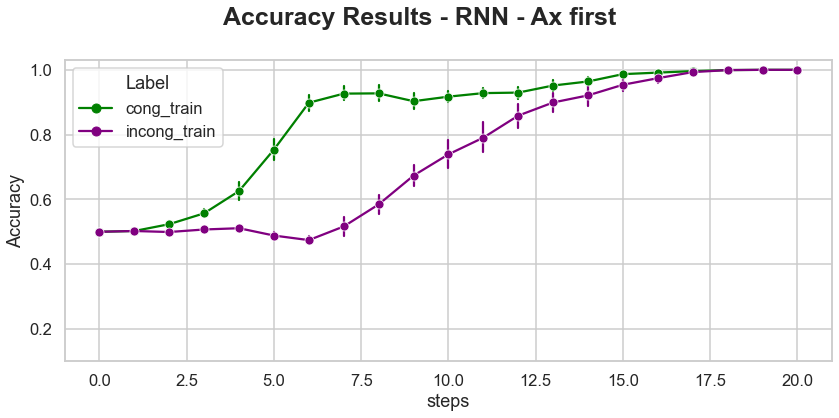

In [57]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNN', 'rnn', ''

dfs = runs_to_df(rnn_runs_ctxF)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

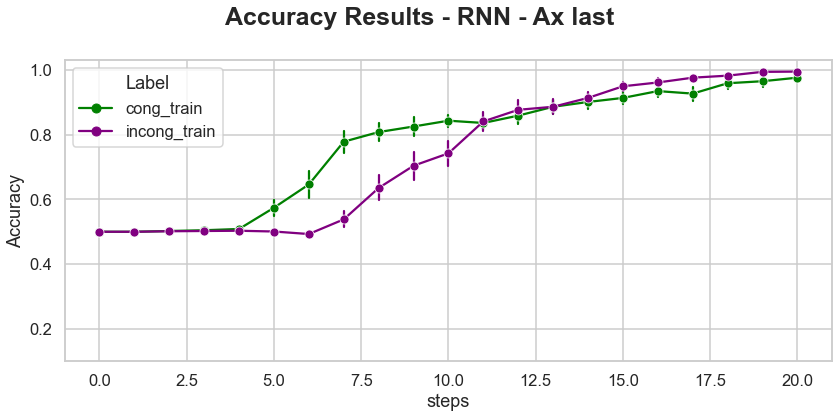

In [56]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNN', 'rnn', ''

dfs = runs_to_df(rnn_runs_ctxL)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# Lesioned RNN

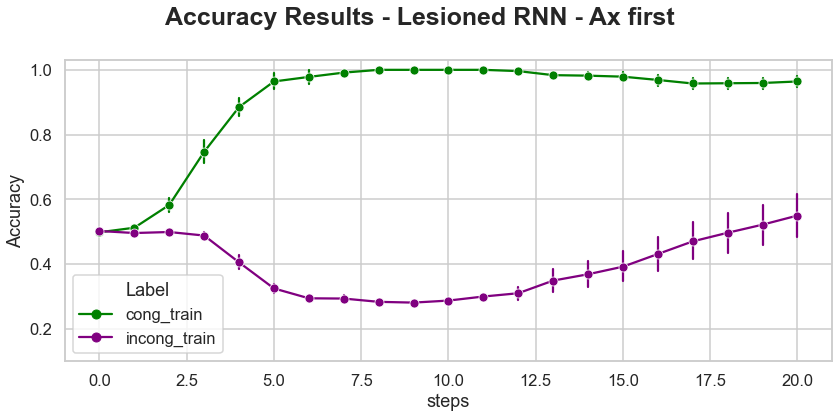

In [55]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'Lesioned RNN', 'rnnlesion0.1', ''

dfs = runs_to_df(rnnlesion_runs_ctxF)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

/Users/maryam/opt/anaconda3/envs/csls/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


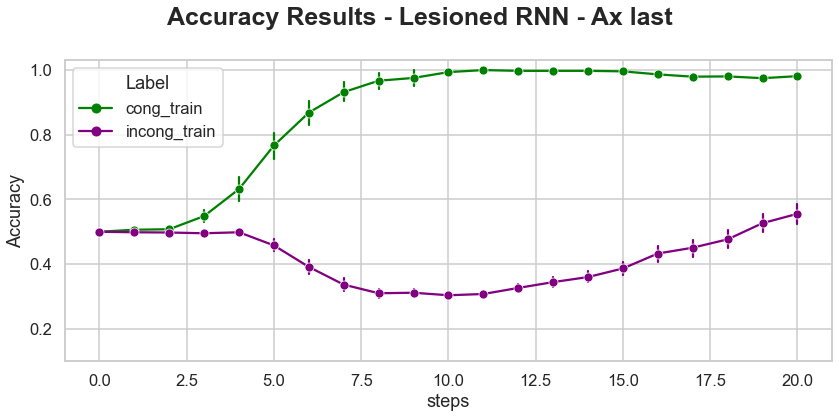

In [54]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'Lesioned RNN', 'rnnlesion0.1', ''

dfs = runs_to_df(rnnlesion_runs_ctxL)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# MLP

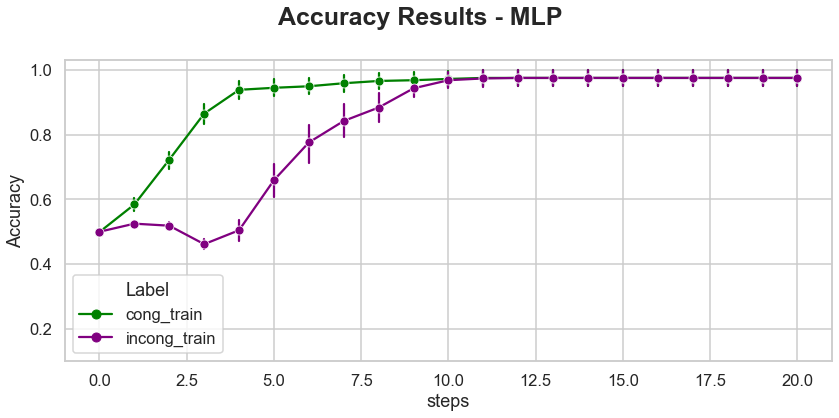

In [46]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'MLP', 'mlp', ''

dfs = runs_to_df(mlp_runs)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# Stepwise MLP 

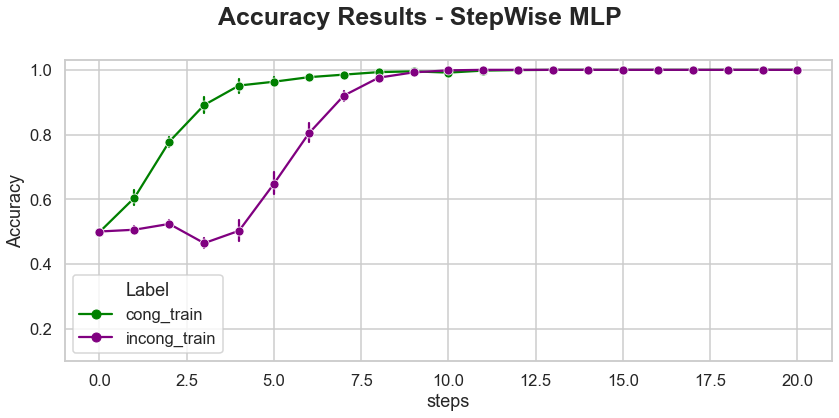

In [47]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'StepWise MLP', 'swmlp', ''

dfs = runs_to_df(swmlp_runs)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# Cognitive Controller

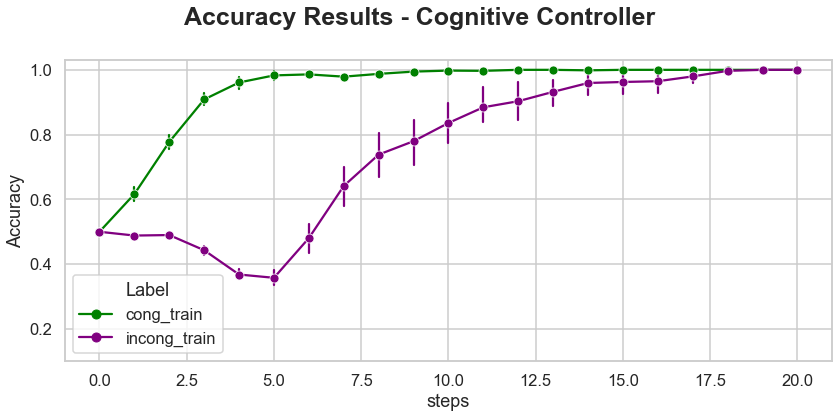

In [50]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = None, None, 'Cognitive Controller', 'mlpcc', ''

dfs = runs_to_df(mlpcc_runs)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)


# RNNCell

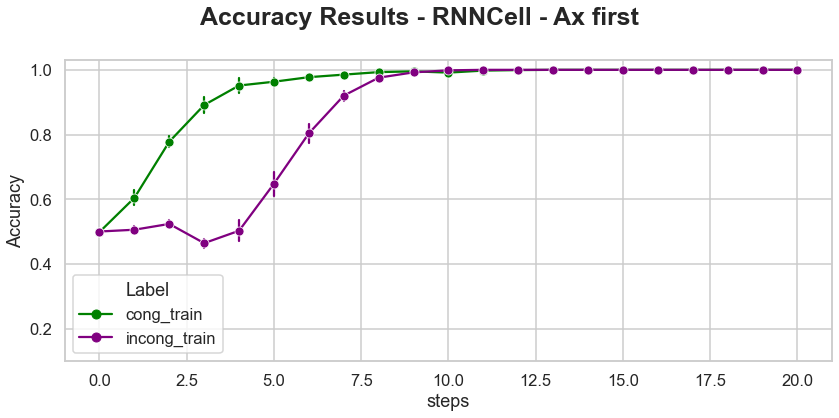

In [49]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNNCell', 'rnncell', ''

dfs = runs_to_df(rnncell_runs_ctxF)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

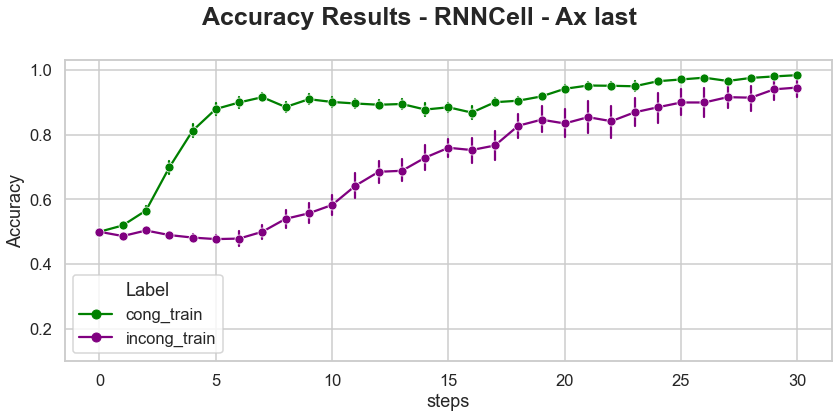

In [51]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNNCell', 'rnncell', ''

dfs = runs_to_df(rnncell_runs_ctxL)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# RNN Balanced

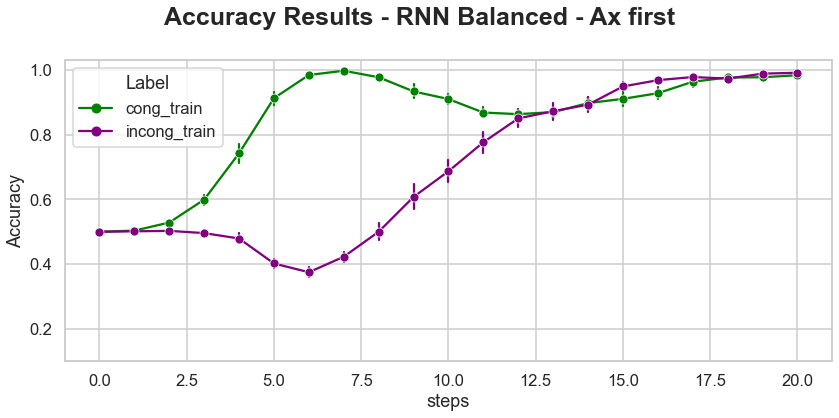

In [52]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'first', 'ctxF', 'RNN Balanced', 'rnnbalanced', ''

dfs = runs_to_df(rnnb_runs_ctxF)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

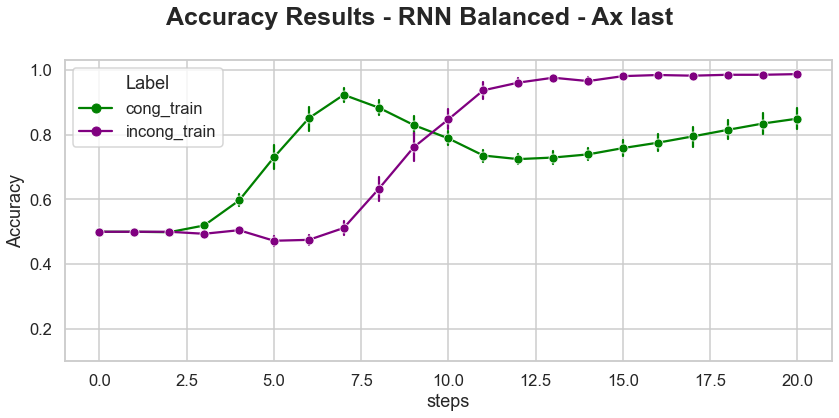

In [53]:
fig, ax = plt.subplots(figsize=(figx,figy))
ctx_order, ctx_order_str, model_str, mfig_str, sub_title = 'last', 'ctxL', 'RNN Balanced', 'rnnbalanced', ''

dfs = runs_to_df(rnnb_runs_ctxL)
plot_cong_incong_accs(dfs, ctx_order, ctx_order_str, model_str, mfig_str, sub_title, ax)

# Subplots - multiple models

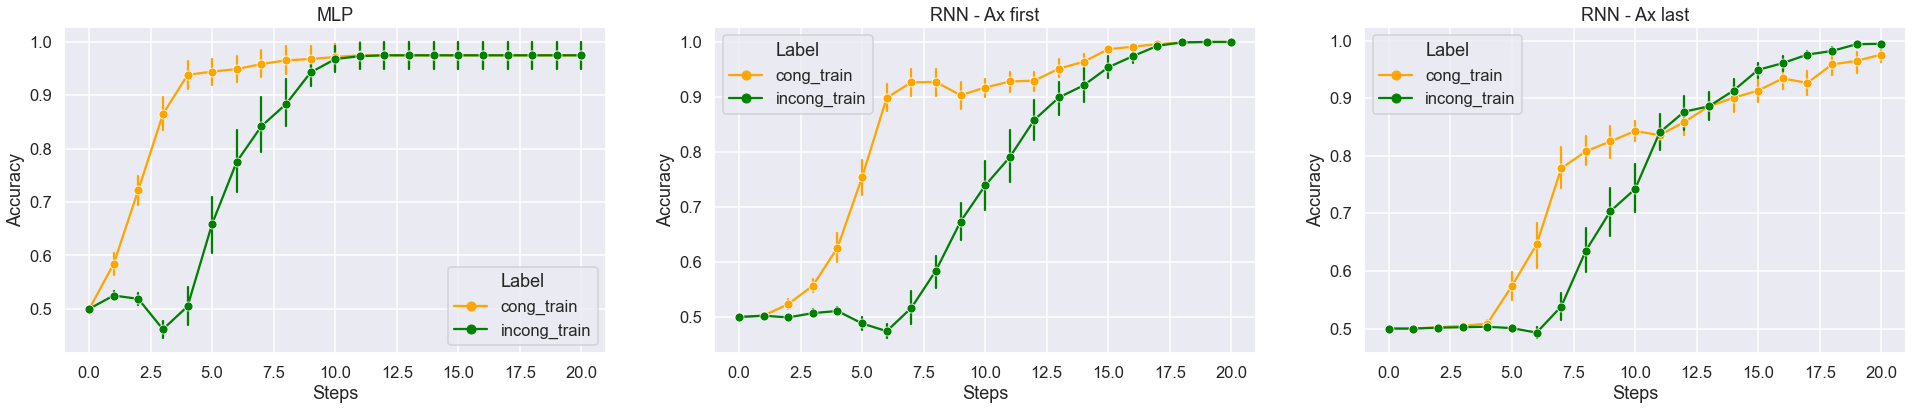

In [18]:
fig, axs = plt.subplots(1,3, figsize = [33, 6])

dfs = runs_to_df(mlp_runs)
ax = plot_accs(dfs, "MLP", axs[0])

ctx_order = 'first'
dfs = runs_to_df(rnn_ctxF_runs)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[1])

ctx_order = 'last'
dfs = runs_to_df(rnn_ctxL_runs)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[2])


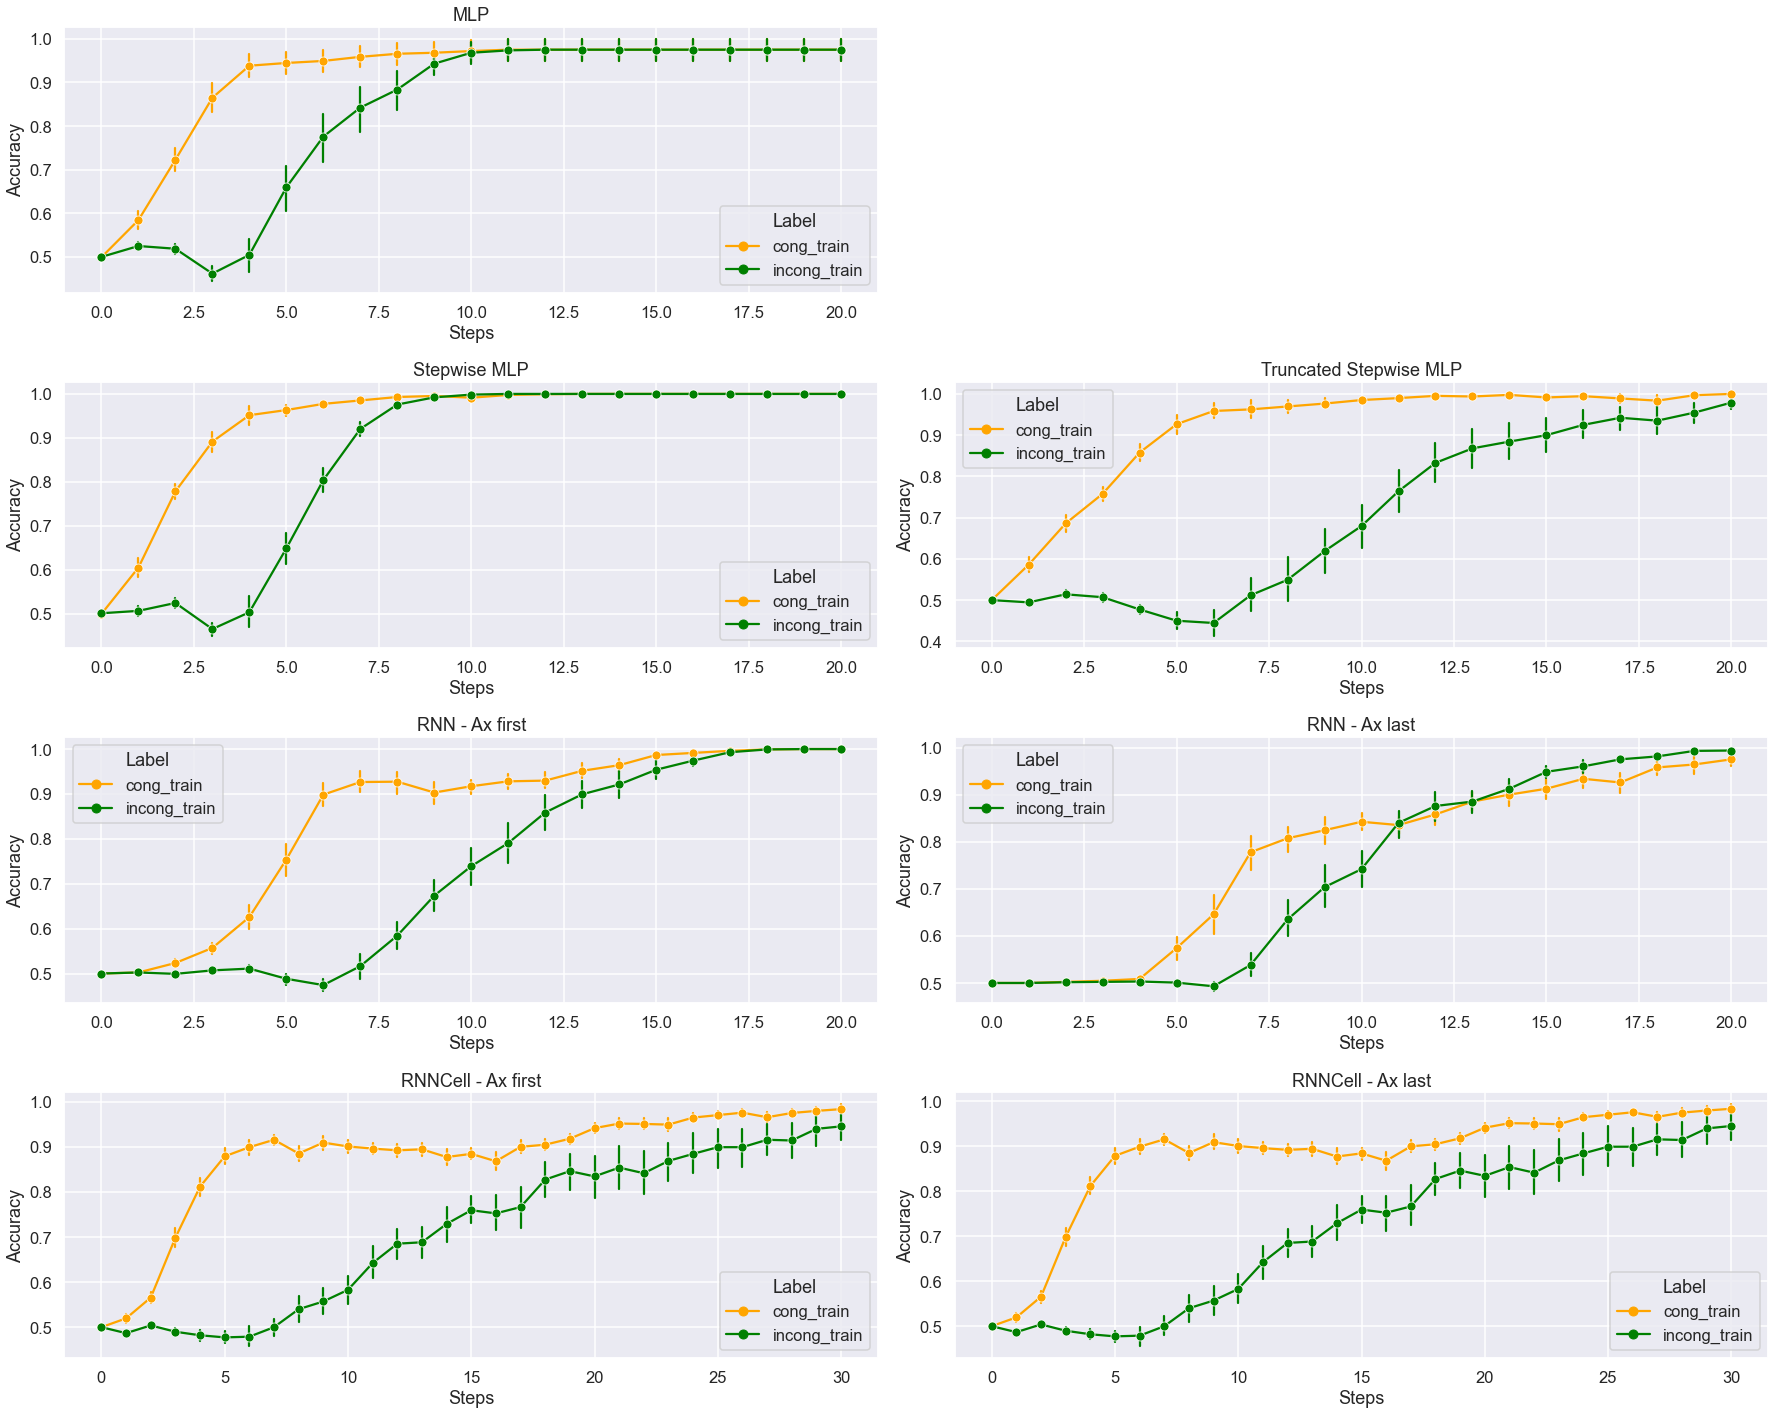

In [19]:
fig, axs = plt.subplots(4,2, figsize = [25, 20])

dfs = runs_to_df(mlp_runs)
ax = plot_accs(dfs, "MLP", axs[0][0])
fig.delaxes(axs[0][1])

dfs = runs_to_df(swmlp_runs)
ax = plot_accs(dfs, "Stepwise MLP", axs[1][0])

dfs = runs_to_df(trunc_swmlp_runs)
ax = plot_accs(dfs, "Truncated Stepwise MLP", axs[1][1])


ctx_order = 'first'
dfs = runs_to_df(rnn_ctxF_runs)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[2][0])

dfs = runs_to_df(rnncell_ctxF_runs)
ax = plot_accs(dfs, "RNNCell - Ax %s" %(ctx_order), axs[3][0])

ctx_order = 'last'
dfs = runs_to_df(rnn_ctxL_runs)
ax = plot_accs(dfs, "RNN - Ax %s" %(ctx_order), axs[2][1])

dfs = runs_to_df(rnncell_ctxL_runs)
ax = plot_accs(dfs, "RNNCell - Ax %s" %(ctx_order), axs[3][1])

plt.tight_layout()


fig_str = 'analyze_accs_cong_incong_results_all_models'
# fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)